# Import

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignoring FutureWarnings

In [26]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df_headers = [
    'sepal_length_in_cm',
    'sepal_width_in_cm',
    'petal_length_in_cm',
    'petal_width_in_cm',
    'class' 
]
df = pd.read_csv('./iris_dataset/iris.data', header=None, names=df_headers)
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df.describe(include=['object'])

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [31]:
# Creating custom functions to visualize features

def make_histplot(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=target_feature, bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)
        

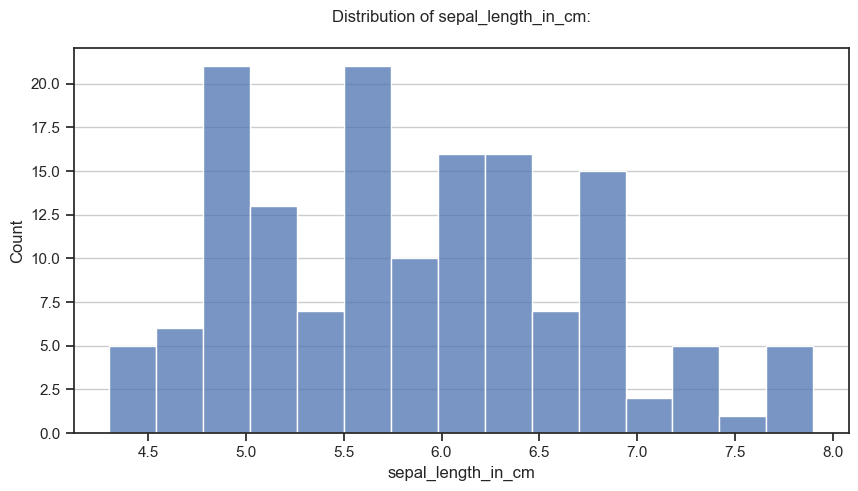

Distribution of sepal_length_in_cm: 5.84 ± 5.80 cm
Median: 5.80 cm
Minimum: 4.3 cm
Maximum: 7.9 cm
0.315 Skewness



In [32]:
make_histplot(df, 'sepal_length_in_cm', bins=15, unit='cm')

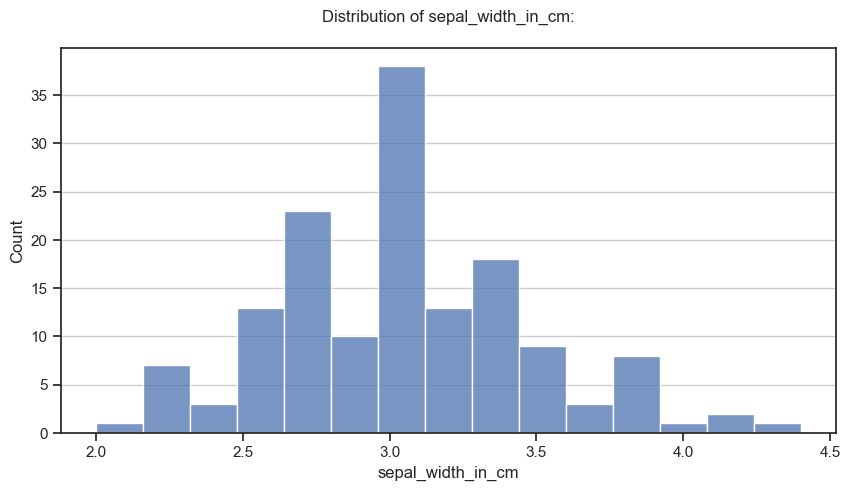

Distribution of sepal_width_in_cm: 3.05 ± 3.00 cm
Median: 3.00 cm
Minimum: 2.0 cm
Maximum: 4.4 cm
0.334 Skewness



In [33]:
make_histplot(df, 'sepal_width_in_cm', bins=15, unit='cm')

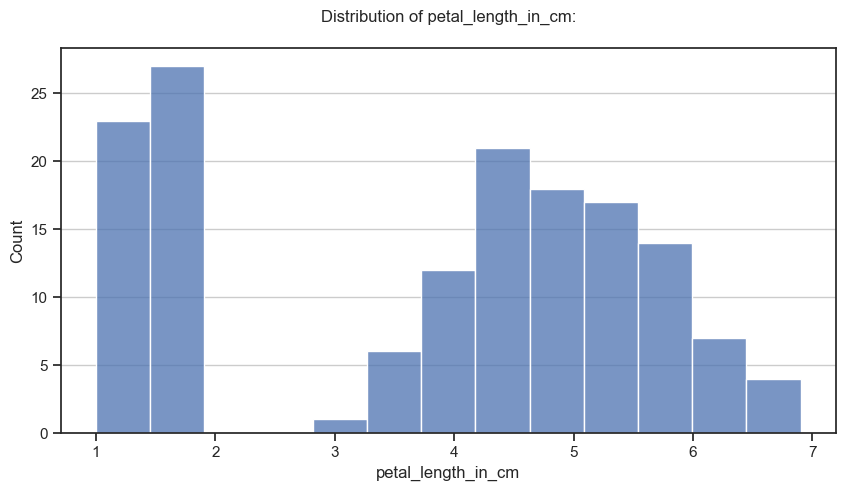

Distribution of petal_length_in_cm: 3.76 ± 4.35 cm
Median: 4.35 cm
Minimum: 1.0 cm
Maximum: 6.9 cm
-0.274 Skewness



In [34]:
make_histplot(df, 'petal_length_in_cm', bins=13, unit='cm')

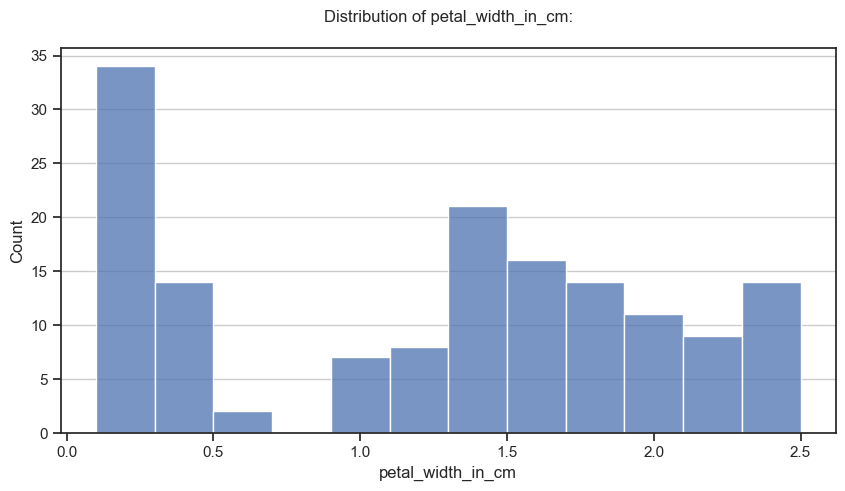

Distribution of petal_width_in_cm: 1.20 ± 1.30 cm
Median: 1.30 cm
Minimum: 0.1 cm
Maximum: 2.5 cm
-0.105 Skewness



In [35]:
make_histplot(df, 'petal_width_in_cm', bins=12, unit='cm')

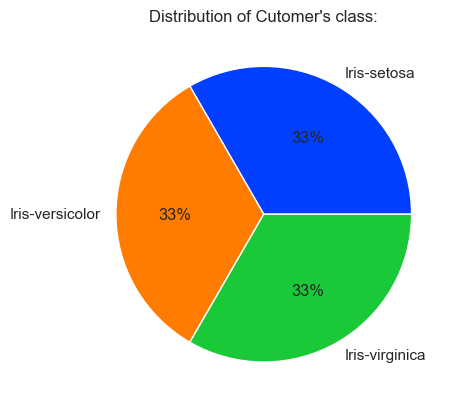

Distribution of cutomer's class:
50 Iris-setosa
50 Iris-versicolor
50 Iris-virginica


In [36]:
make_piechart(df, 'class')

**The dataset have perfectly balanced number of entries for each classes (dependent feature). All of the 4 independent features are continuous quantative data and aren't are skewed. So no need for categorical encoding.**

# Checking Missing Values

In [37]:
df.isnull().any()

sepal_length_in_cm    False
sepal_width_in_cm     False
petal_length_in_cm    False
petal_width_in_cm     False
class                 False
dtype: bool

**There are no missing values in the dataset**

# Checking Duplicates

In [38]:
df[df.duplicated()]

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [39]:
df = df.drop_duplicates()
df.shape

(147, 5)

**3 duplicates were removed**

# Visualizing correlation

d:\LetsGrowMore\LGMVIP-DataScience\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


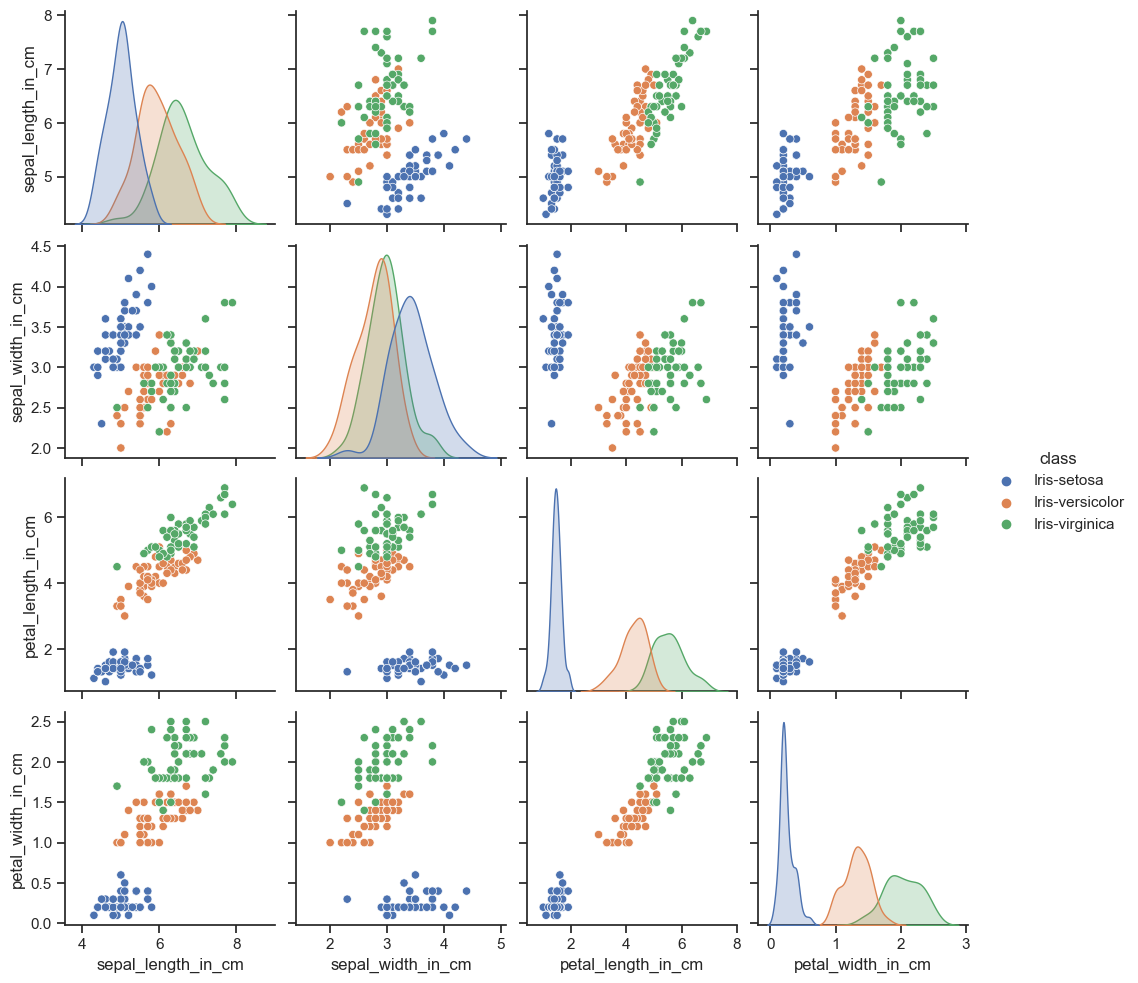

In [40]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue='class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

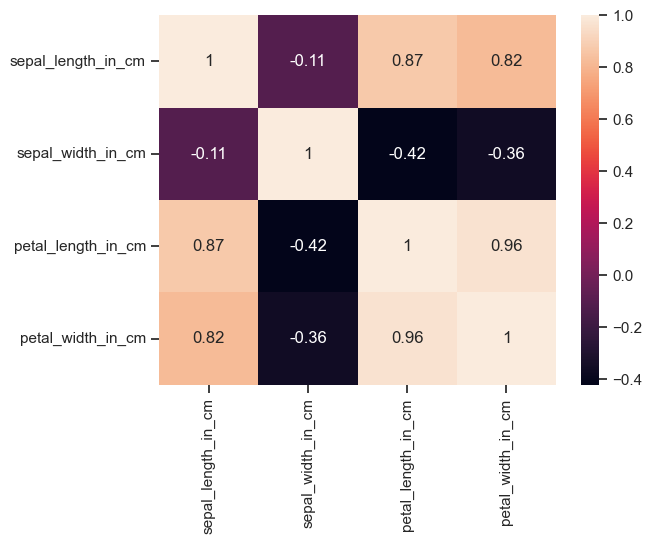

In [41]:
# Showing correlation heatmap
sns.heatmap(corr, annot=True)
plt.show

# Creating base models